In [11]:
import sys

sys.path.append("../")
from scipy.constants import eV
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from src.fem_radial import *

In [12]:
xs = np.linspace(0, 1, 500)
xs = np.exp(1.1 * xs) - 1
xs /= xs[-1] * 1e9
fem = FemRadial(xs)

In [13]:
block_k = fem.get_block_K()
block_V = fem.get_block_V()
block_M = fem.get_block_M()

In [14]:
K = fem.assemble_matrix(block_k)
V = fem.assemble_matrix(block_V)
M = fem.assemble_matrix(block_M)

In [15]:
val, vec = eigsh((K + V)[:-2, :-2], 3, M[:-2, :-2], which="LA", sigma=-1e-10)
# val, vec = eigsh((K + V)[:-1, :-1], 1, M[:-1, :-1], which="SA")
vec = vec / np.linalg.norm(vec, axis=0)

Text(0, 0.5, 'Wavefunction')

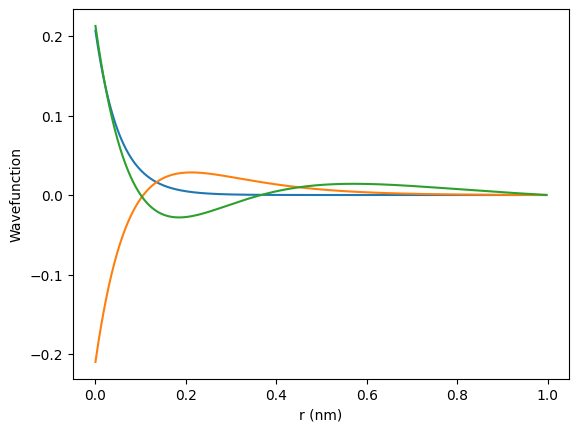

In [16]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, vec)
ax.set_xlabel("r (nm)")
ax.set_ylabel("Wavefunction")

In [17]:
val

array([-2.17976170e-18, -5.44803395e-19, -2.06724132e-19])

In [18]:
val / eV

array([-13.60500245,  -3.40039533,  -1.29027055])